In [1]:
import numpy as np
import pandas as pd
import re
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')
set_matplotlib_formats('retina', 'png')

path_to_results = "/faststorage/home/eriks/relate-clues/results/"
run = "CEU_kept_chrom2_136000000_137000000_1000_clues/"
temp_clues = "tmp/"
table = "clues_table.txt"

In [2]:
df = pd.read_table(path_to_results+run+table, sep=" ")
df["relate_p_transformed"] = -df["relate_p"]
print(df.head())
df.plot.scatter(x="pos", y="relate_p_transformed")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2af2766a3790>]],
      dtype=object)

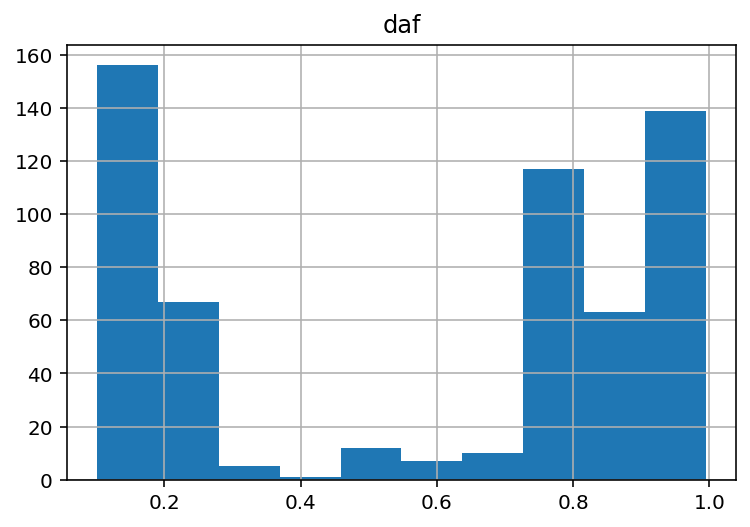

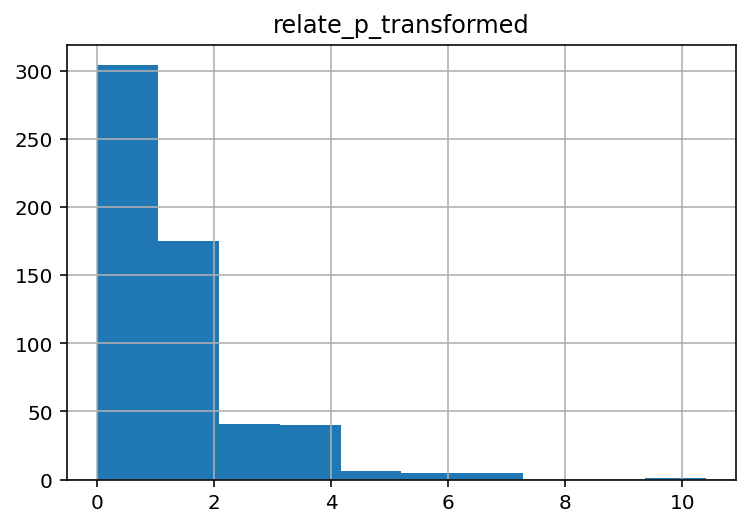

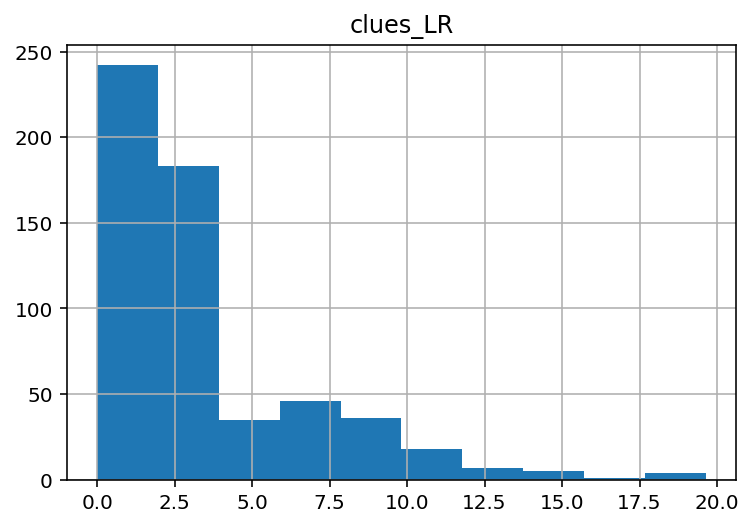

In [4]:
#plotting combinations of data, starting with histograms
df.hist("daf")
df.hist("relate_p_transformed")
df.hist("clues_LR")

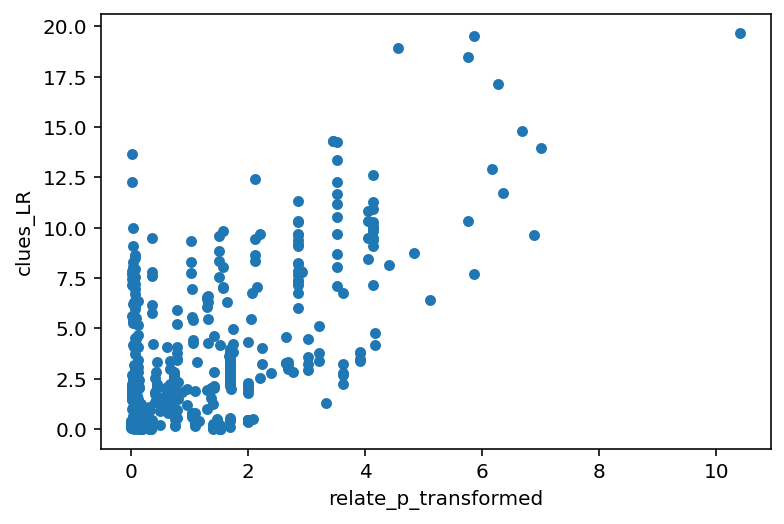

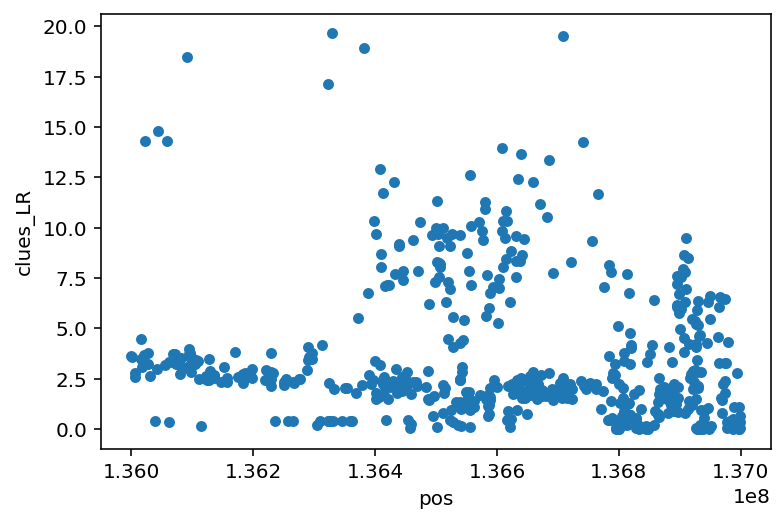

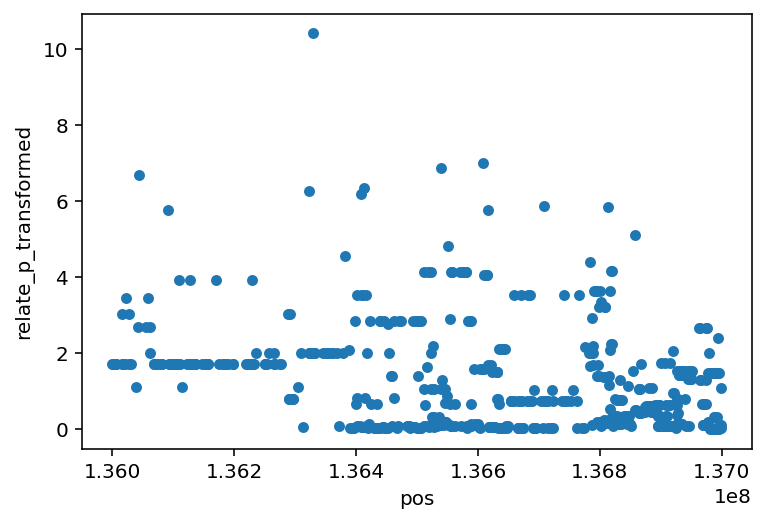

In [5]:
#The combinations between position and the resulting statistics.
df.plot.scatter(x = "relate_p_transformed", y="clues_LR")
df.plot.scatter(x = "pos", y="clues_LR")
df.plot.scatter(x = "pos", y="relate_p_transformed")

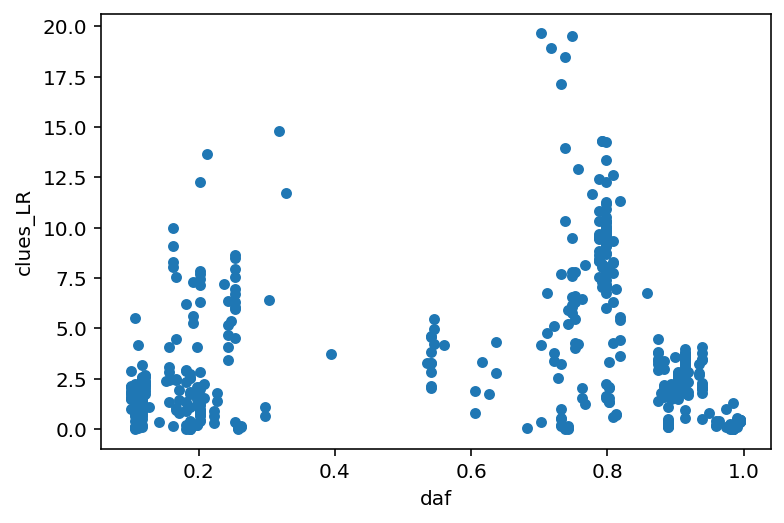

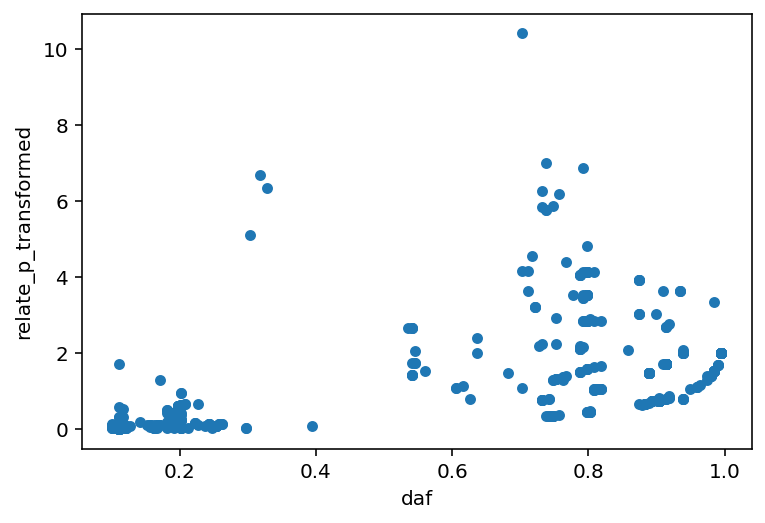

In [6]:
# The association with daf.
df.plot.scatter(x="daf", y="clues_LR")
df.plot.scatter(x="daf", y="relate_p_transformed")

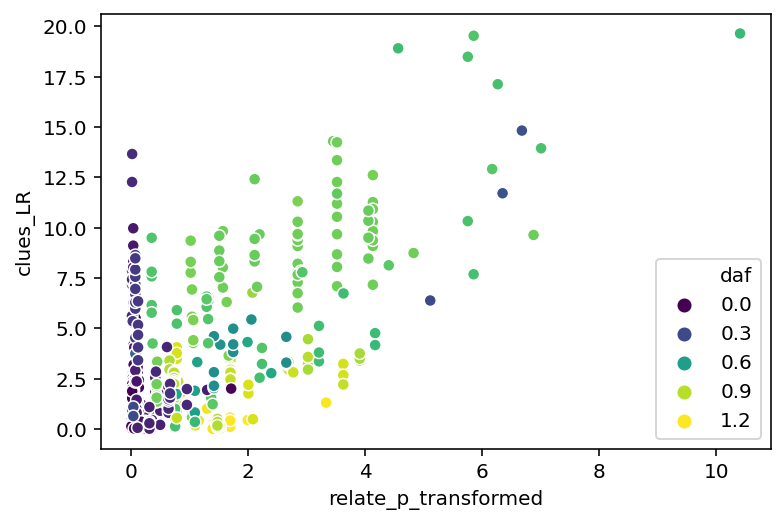

In [7]:
colorplot = sns.scatterplot(x="relate_p_transformed", y="clues_LR", hue="daf", palette="viridis", data=df)
fig = colorplot.get_figure()
fig.savefig("colorplot.pdf")

In [8]:
# Looking at correlation of clues with same input/parameters
path_to_results = "/faststorage/home/eriks/relate-clues/results/"
runs = ["CEU_kept_chrom2_136000000_137000000_100_test1_clues/", "CEU_kept_chrom2_136000000_137000000_100_test2_clues/", "CEU_kept_chrom2_136000000_137000000_100_test3_clues/"]
temp_clues = "tmp/"
table = "clues_table.txt"
l = []
for path in runs:
    df = pd.read_table(path_to_results+path+table, sep=" ")
    l.append(df)

In [9]:
test1_LR = l[0]["clues_LR"]
test2_LR = l[1]["clues_LR"]
test3_LR = l[2]["clues_LR"]
df_LR = pd.merge(test1_LR, test2_LR)

In [10]:
print(test1_LR.corr(test2_LR), test1_LR.corr(test3_LR), test2_LR.corr(test3_LR))

0.9807645374385194 0.9806204838984685 0.9845676730732972


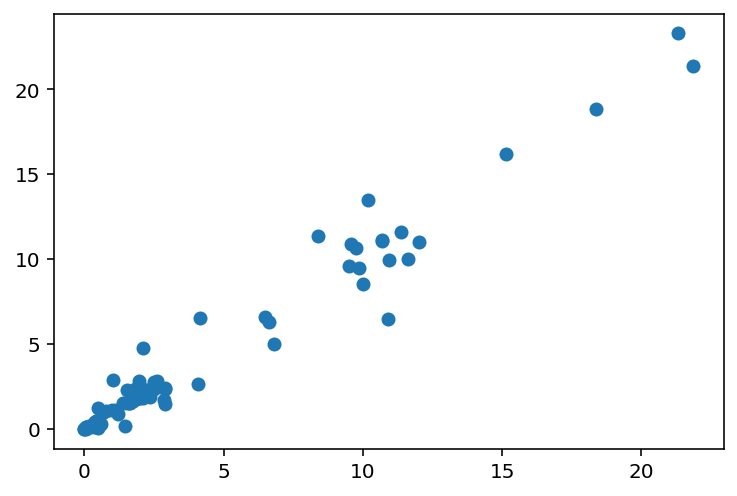

In [11]:
plt.scatter(test1_LR, test2_LR)

In [12]:
path_to_results = "/faststorage/home/eriks/relate-clues/results/"
runs = ["CEU_kept_chrom2_136000000_137000000_100_test8_clues/", "CEU_kept_chrom2_136000000_137000000_100_test9_clues/", "CEU_kept_chrom2_136000000_137000000_100_test10_clues/"]
temp_clues = "tmp/"
table = "clues_table.txt"
l = []
for path in runs:
    df = pd.read_table(path_to_results+path+table, sep=" ")
    l.append(df)
test8_LR = l[0]["clues_LR"]
test9_LR = l[1]["clues_LR"]
test10_LR = l[2]["clues_LR"]
df_LR = pd.merge(test1_LR, test2_LR)

In [13]:
print(test8_LR.corr(test9_LR), test8_LR.corr(test10_LR), test9_LR.corr(test10_LR))

0.9681726496686678 0.9570616103643336 0.9671927128280138


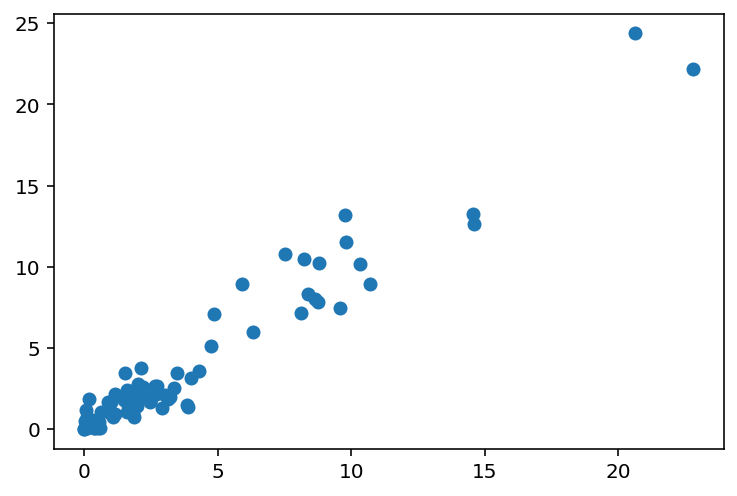

In [14]:
plt.scatter(test8_LR, test9_LR)

In [15]:
path_to_results = "/faststorage/home/eriks/relate-clues/results/"
run = "CEU_kept_chrom2_136000000_137000000_100_prio_test1_clues/"
temp_clues = "tmp/"
table = "clues_table.txt"

         pos       rs_id  DataFreq  lineages  relate_p       daf  clues_LR  \
0  136000253  rs16831481       181       198  -1.69792  0.914141    1.8139   
1  136016079  rs11884903       173       198  -3.02286  0.873737    2.0895   
2  136022798    rs935613       157       198  -3.45236  0.792929   12.4151   
3  136031588   rs6710841       181       198  -1.69792  0.914141    1.7636   
4  136043944  rs13023281        63       198  -6.67670  0.318182   14.4153   

   relate_p_transformed  
0               1.69792  
1               3.02286  
2               3.45236  
3               1.69792  
4               6.67670  


0.7084343517352835

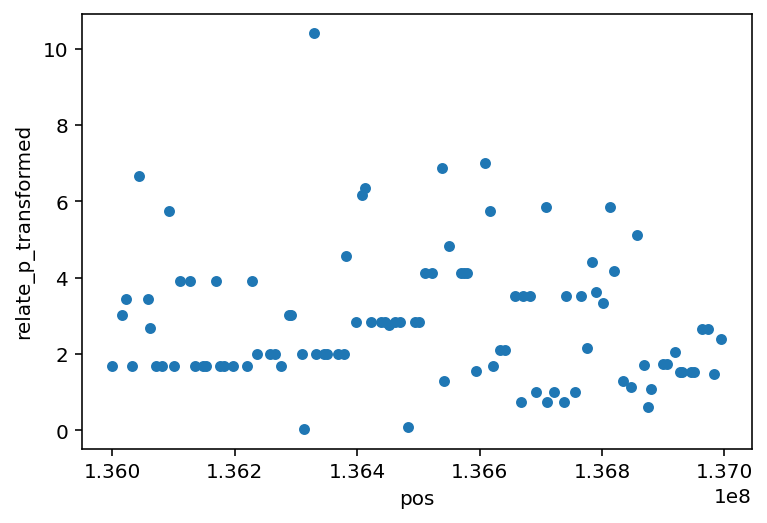

In [23]:
df = pd.read_table(path_to_results+run+table, sep=" ")
df["relate_p_transformed"] = -df["relate_p"]
print(df.head())
df.plot.scatter(x="pos", y="relate_p_transformed")
df["relate_p_transformed"].corr(df["clues_LR"])

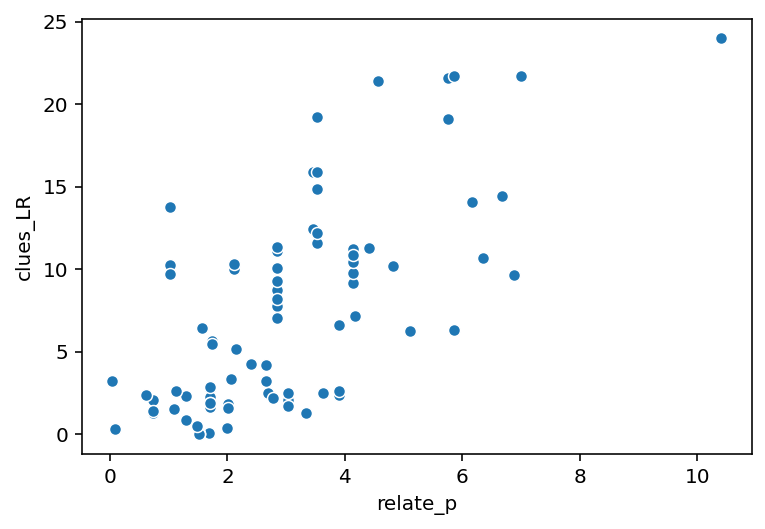

In [22]:
df.plot.scatter(x="relate_p_transformed", y ="clues_LR")
colorplot = sns.scatterplot(x="relate_p_transformed", y="clues_LR", data=df)
plt.xlabel("relate_p")
fig = colorplot.get_figure()
fig.savefig("relation_plot.pdf")